In [1]:
import HARK.ConsumptionSaving.ConsPortfolioModel as cpm
from HARK.Calibration.Income.IncomeTools import (
     sabelhaus_song_var_profile,
)
from sharkfin.expectations import *
from sharkfin.population import *
from sharkfin.markets import *
from sharkfin.simulation import *
import logging
import math
from math import exp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def run_simulation(agent_parameters, dist_params, n_per_class, a=None, q=None, r= None, fm=None, market=None, dphm=1500):
    #initialize population
    pop = AgentPopulation(agent_parameters, dist_params, n_per_class)
    
    market = MockMarket()
    
    #initialize the financial Fodel
    Fm = FinanceModel
    
    #initialize population model
    pop.init_simulation()
    
    attsim = AttentionSimulation(pop, Fm, a=a, q=q, r=r, market=market, dphm=dphm, days_per_quarter = 30)
    attsim.simulate()
    
    return attsim, attsim.sim_stats()

In [3]:
dist_params = {
    'CRRA' : {'bot' : 2, 'top' : 10, 'n' : 2}, # Chosen for "interesting" results
    'DiscFac' : {'bot' : 0.936, 'top' : 0.978, 'n' : 2} # from CSTW "MPC" results
}

ssvp = sabelhaus_song_var_profile()

#assume all agents are 27
idx_40 = ssvp['Age'].index(40)

#parameters shared by all agents
agent_parameters = {
    'aNrmInitStd' : 0.0,
    'LivPrb' : [0.98 ** 0.25],
    'PermGroFac': [1.01 ** 0.25],
    'pLvlInitMean' : 1.0, # initial distribution of permanent income
    'pLvlInitStd' : 0.0,
    'Rfree' : 1.0,
    'TranShkStd' : [ssvp['TranShkStd'][idx_40] / 2],  # Adjust non-multiplicative shock to quarterly
    'PermShkStd' : [ssvp['PermShkStd'][idx_40] ** 0.25]
}

In [4]:
sim, sim_stats = run_simulation(agent_parameters, dist_params, 10, a=0.2, q=8, r = 10, dphm=10500)

/home/sb/.local/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/sb/.local/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/sb/.local/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Q-0
run_market, buy_sell: (0, 0)
price: 100.53710166167842
run_market, buy_sell: (233, 150)
price: 101.85567522901749
run_market, buy_sell: (1, 61)
price: 95.4613718126443
run_market, buy_sell: (259, 108)
price: 97.15673982437805
run_market, buy_sell: (929, 47)
price: 95.11239744432766
run_market, buy_sell: (21, 44)
price: 90.77466226908847
run_market, buy_sell: (3210, 91)
price: 95.29699633652055
run_market, buy_sell: (1209, 142)
price: 99.6886637107051
run_market, buy_sell: (0, 223)
price: 104.55445182883595
run_market, buy_sell: (667, 36)
price: 98.35451327509311
Q-1
run_market, buy_sell: (709, 2)
price: 99.21137286255367
run_market, buy_sell: (729, 593)
price: 96.59072488974826
run_market, buy_sell: (1690, 455)
price: 86.47864294960979
run_market, buy_sell: (0, 1313)
price: 86.52848153471966
run_market, buy_sell: (2344, 540)
price: 78.7340279422972
run_market, buy_sell: (1680, 794)
price: 81.99465605419753
run_market, buy_sell: (0, 1343)
price: 84.43790782355528
run_market, buy_sel

In [5]:
data = sim.data()

In [6]:
data

,t,prices,buy,sell,buy_macro,sell_macro,owned,total_assets,mean_income,total_consumption,permshock_std,ror,expected_ror,expected_std
0,0,100.537102,0,0,0,0,5221.897505,525112.123522,27837.478763,36276.659166,0.000000,0.005371,0.000807,0.011793
1,1,101.077088,0,0,0,0,5221.897505,527947.022330,27837.478763,0.000000,0.000000,0.005371,0.000978,0.011598
2,2,101.619975,0,0,0,0,5145.982679,523080.936948,27111.050390,35701.559443,0.120032,0.005371,0.001144,0.011403
3,3,102.165777,0,0,0,0,5145.982679,525904.713060,27111.050390,0.000000,0.120032,0.005371,0.001303,0.011208
4,4,102.714511,0,0,0,0,5145.982679,528743.655722,27111.050390,0.000000,0.120032,0.005371,0.001456,0.011013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,475,108.429320,0,0,0,0,7385.125957,584640.911686,22318.416146,0.000000,0.527849,-0.002584,0.006664,0.005966
476,476,108.149174,0,0,0,0,7385.125957,582577.341269,22318.416146,0.000000,0.527849,-0.002584,0.005981,0.006230
477,477,107.869751,0,0,0,0,7385.125957,580519.102451,22318.416146,0.000000,0.527849,-0.002584,0.005348,0.006400
478,478,107.591051,0,0,0,0,7385.125957,578466.181457,22318.416146,0.000000,0.527849,-0.002584,0.004762,0.006499


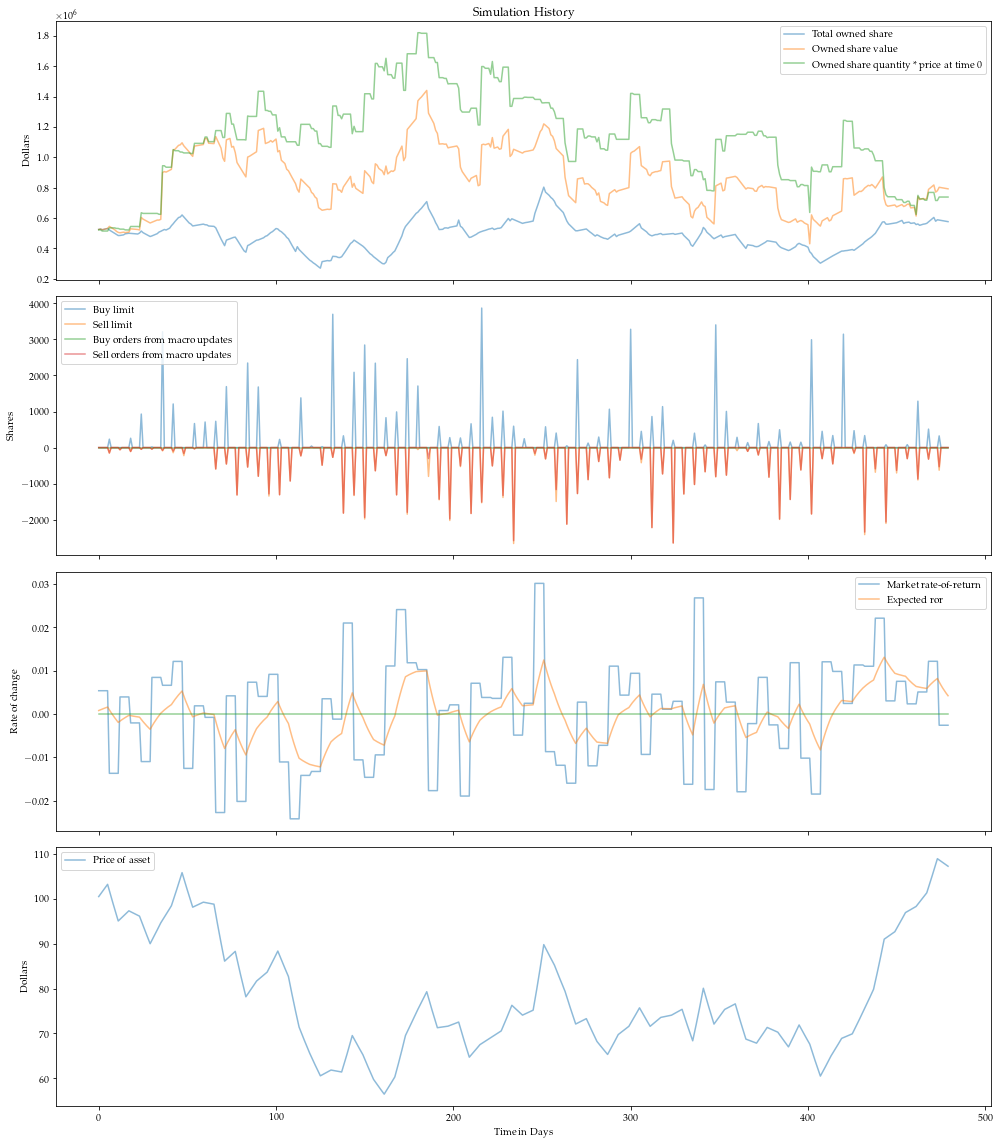

In [7]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})


fig, ax = plt.subplots(4,
    sharex='col',
    figsize=(14,16),
)

ax[0].plot(data['total_assets'], alpha=0.5, label='Total owned share')
ax[0].plot([p * o for (p,o) in zip(data['prices'], data['owned'])], alpha=0.5, label='Owned share value')
ax[0].plot([100 * o for (p,o) in zip(data['prices'], data['owned'])], alpha=0.5, label='Owned share quantity * price at time 0')
ax[0].legend()

ax[1].plot(data['buy'], alpha=0.5, label='Buy limit')
ax[1].plot(-data['sell'], alpha=0.5, label='Sell limit')
ax[1].plot(data['buy_macro'], alpha=0.5, label='Buy orders from macro updates')
ax[1].plot(-data['sell_macro'], alpha=0.5, label='Sell orders from macro updates')
ax[1].legend()

ax[2].plot(data['ror'], alpha=0.5, label='Market rate-of-return')
ax[2].plot(data['expected_ror'], alpha=0.5, label='Expected ror')
ax[2].plot(np.zeros(data['expected_ror'].shape), alpha=0.5)
ax[2].legend()

ax[3].plot(data['prices'], alpha=0.5, label='Price of asset')
ax[3].legend()

ax[0].set_title("Simulation History")
ax[0].set_ylabel("Dollars")
ax[1].set_ylabel("Shares")
ax[2].set_ylabel("Rate of change")
ax[3].set_ylabel("Dollars")
ax[3].set_xlabel("Time in Days")

plt.tight_layout()
plt.savefig("asset_bubble_run.png")
plt.show()

